In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ardi_data = pd.read_csv("Cleaned_1_data.csv")

ardi_data

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,ConditionType,Category,Cause_of_Death,Data_Value_Alt,Effect,ConsumptionPattern,Sex,AgeGroup
0,2015,2019,AL,Alabama,ARDI,Acute,Alcohol-Related Poisonings,Poisoning (not alcohol),134.0,Harmful Effects,Excessive Alcohol Use,Male,Overall
1,2015,2019,AL,Alabama,ARDI,Acute,Alcohol-Related Poisonings,Poisoning (not alcohol),82.0,Harmful Effects,Excessive Alcohol Use,Female,Overall
2,2015,2019,AL,Alabama,ARDI,Acute,Motor Vehicle Traffic Crashes,Motor vehicle traffic crashes,247.0,Harmful Effects,Excessive Alcohol Use,Male,Overall
3,2015,2019,AL,Alabama,ARDI,Acute,Motor Vehicle Traffic Crashes,Motor vehicle traffic crashes,72.0,Harmful Effects,Excessive Alcohol Use,Female,Overall
4,2015,2019,AL,Alabama,ARDI,Acute,Other Acute Causes,Fire injuries,13.0,Harmful Effects,Excessive Alcohol Use,Female,Overall
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2015,2019,WI,Wisconsin,ARDI,Chronic,"Liver, Gallbladder, and Pancreas","Liver cirrhosis, unspecified",79.0,Harmful Effects,Any Alcohol Use,Male,Overall
2516,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcoholic liver disease,30.0,Harmful Effects,Excessive Alcohol Use,Female,Overall
2517,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcoholic liver disease,57.0,Harmful Effects,Excessive Alcohol Use,Male,Overall
2518,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcoholic liver disease,30.0,Harmful Effects,Any Alcohol Use,Female,Overall


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# # Load the dataset from ardi_data
# df = pd.read_csv('ardi_data.csv')

# Encode categorical variables
label_encoders = {}
categorical_columns = ['AgeGroup','LocationAbbr', 'ConditionType', 'Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on Sex using SVR
def predict_by_sex_svr(sex):
    df_filtered = ardi_data[ardi_data['Sex'] == sex]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['AgeGroup','LocationAbbr', 'ConditionType', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = SVR(kernel='linear')  # Using a linear kernel for SVR
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    linear_mse = mean_squared_error(y_test, y_pred)
    linear_mae = mean_absolute_error(y_test, y_pred)

    linear_r2 = r2_score(y_test, y_pred)
    
    return y_pred, linear_mse, linear_mae, linear_r2

# Example prediction using SVR based on Sex
sex = 'Male'

prediction, linear_mse, linear_mae, linear_r2 = predict_by_sex_svr(sex)
print(f"SVR Predicted values for '{sex}':", prediction)
print("Mean Squared Error (MSE):", linear_mse)
print("Mean Absolute Error (MAE):", linear_mae)
print("R-squared (R2):", linear_r2)


SVR Predicted values for 'Male': [ 78.65219015  75.12944931  91.64183106  78.12235608  75.03116763
  74.14509567  76.40293056  79.66485764 121.39533251  79.90031423
  77.34743868  88.49315908  82.24299389  88.71317469  81.58399617
  78.19051546  75.12944931  72.6075522   89.5155498   79.21872042
  89.41201793  74.28141444  76.10667512  63.3197731   82.10667512
  79.26562458  89.1393804   78.53140885  74.76920596  80.87980626
  71.29698649  87.40260898  91.84630921  64.20584506  73.56178354
  72.98638619  90.14232467  75.47024622 118.80527602 113.07791355
  77.49348066  80.56160545  75.85975606  77.44076227  74.5899885
  74.14509567  75.27158231  87.47076836  81.31135865  78.67344537
 119.00975416  89.39257148  91.09655601  75.17816224 121.39533251
  79.55370309  77.38452313 120.10030427  81.24319927  79.65293739
  88.93490226  73.76626168  74.89484887  72.91822681 119.89582612
  90.82611551  76.74582802  80.0163304  120.30478241  75.39236361
  71.97858031  80.78638619  80.35712731  80.

In [4]:
# based on location Xgboost

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['AgeGroup', 'LocationAbbr', 'ConditionType', 'Category', 'Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on Sex using XGBoost
def predict_by_sex_xgboost(sex):
    df_filtered = ardi_data[ardi_data['Sex'] == sex]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['AgeGroup', 'LocationAbbr', 'ConditionType', 'Category', 'Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = XGBRegressor()  # Using XGBoost for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    xgboost_mse = mean_squared_error(y_test, y_pred)
    xgboost_mae = mean_absolute_error(y_test, y_pred)
    xgboost_r2 = r2_score(y_test, y_pred)
    
    return y_pred, xgboost_mse, xgboost_mae, xgboost_r2

# Example prediction using XGBoost based on Sex
sex = 'Male'

prediction, xgboost_mse, xgboost_mae, xgboost_r2 = predict_by_sex_xgboost(sex)
print(f"XGBoost Predicted values for '{sex}':", prediction)
print("Mean Squared Error (MSE):", xgboost_mse)
print("Mean Absolute Error (MAE):", xgboost_mae)
print("R-squared (R2):", xgboost_r2)


XGBoost Predicted values for 'Male': [143.76245   128.30585   332.82916    45.49981   318.1857     85.85951
 100.28225    91.23266   459.3897     89.60399    99.05177    17.574165
  95.375694   63.02767   552.44995    18.63417   128.30585    95.10244
  32.03307   323.6612     64.49199   135.72256    63.647945   37.345093
 745.41345    25.89315    53.85561    35.704216  132.38075   216.13623
  40.99292    90.23677    41.480473   89.708664   70.49816   333.01242
 137.94046    91.59877   271.23395   588.6634    222.06947    72.950325
 117.38572    99.34705    63.896786   85.85951    77.56543   -64.662674
  16.415867  669.33417   119.05566   162.11255   225.96605    86.08648
 459.3897     36.861702  178.10143   166.7745    374.8803    177.84767
  41.56533    30.731314   44.302456  180.82518    36.519657  -17.331894
  64.66839   131.9729    383.0107    171.40897    75.74185    79.11486
 246.16412   133.85861   313.66907    24.991846   36.431244   68.85993
  74.55835   -24.872116  100.71787 

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['AgeGroup', 'LocationAbbr', 'ConditionType', 'Category', 'Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on Sex using Random Forest
def predict_by_sex_random_forest(sex):
    df_filtered = ardi_data[ardi_data['Sex'] == sex]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['AgeGroup', 'LocationAbbr', 'ConditionType', 'Category', 'Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor()  # Using RandomForestRegressor for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    rf_mse = mean_squared_error(y_test, y_pred)
    rf_mae = mean_absolute_error(y_test, y_pred)
    rf_r2 = r2_score(y_test, y_pred)
    
    return y_pred, rf_mse, rf_mae, rf_r2

# Example prediction using Random Forest based on Sex
sex = 'Male'

prediction, rf_mse, rf_mae, rf_r2 = predict_by_sex_random_forest(sex)
print(f"Random Forest Predicted values for '{sex}':", prediction)
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R2):", rf_r2)


Random Forest Predicted values for 'Male': [174.26       125.44       309.03        32.32       256.724
  65.70566667 153.88        58.57533333 375.49333333 112.69
  59.04866667  22.13333333 109.6         50.91333333 483.9275
  36.34       125.44        84.73        56.93433333 317.41
  58.47       148.57666667 287.06        20.992      747.35
  56.26        68.76       104.12       106.65       199.12
  55.51        67.019       53.17        71.075       94.72
 302.8025     145.91       115.79       357.33       754.68
 215.08        86.7845     131.645       79.05       111.605
  65.70566667  82.49        55.82666667  44.82       624.89
 438.23       170.24       204.6         96.648      375.49333333
  69.825      224.85966667 209.84       318.58       198.89
  51.06        56.47        48.16       190.78        66.02
  56.127       82.08333333 108.00916667 344.69       157.79433333
  80.91        76.32       189.4575     119.79333333 327.06
  55.59       229.07        81.016       

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR  # Import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['AgeGroup', 'LocationAbbr', 'ConditionType', 'Category', 'Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on Sex using SVR
def predict_by_sex_svr(sex):
    df_filtered = ardi_data[ardi_data['Sex'] == sex]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['AgeGroup', 'LocationAbbr', 'ConditionType', 'Category', 'Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = SVR()  # Using SVR for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    svr_mse = mean_squared_error(y_test, y_pred)
    svr_mae = mean_absolute_error(y_test, y_pred)
    svr_r2 = r2_score(y_test, y_pred)
    
    return y_pred, svr_mse, svr_mae, svr_r2

# Example prediction using SVR based on Sex
sex = 'Male'

prediction, svr_mse, svr_mae, svr_r2 = predict_by_sex_svr(sex)
print(f"SVR Predicted values for '{sex}':", prediction)
print("Mean Squared Error (MSE):", svr_mse)
print("Mean Absolute Error (MAE):", svr_mae)
print("R-squared (R2):", svr_r2)


SVR Predicted values for 'Male': [77.15892627 79.28794762 80.12872172 77.36255484 80.52630759 76.75884984
 76.96482618 78.524202   83.35398821 84.95669654 78.91301034 82.2367167
 82.33234837 86.4149624  81.74740654 77.27514324 79.28794762 77.10489078
 83.98887137 87.25585752 76.51076471 77.0541298  81.58677178 75.26148168
 81.59229476 79.587658   76.63186466 76.76845395 81.24393051 78.29654739
 77.23109035 85.6911687  80.61515571 78.05146667 77.06708339 78.21721433
 83.02264701 80.76797902 86.22977471 85.89570472 76.61107449 78.78586393
 79.42158718 79.00576154 78.08432085 76.75884984 77.25683503 85.46533877
 80.44527428 87.91155378 86.02692119 83.67099369 80.18551064 79.9560064
 83.35398821 81.41595121 80.16729934 82.47650457 80.15812675 81.24722942
 76.70911341 77.01454308 79.73919687 78.37993603 83.16638831 84.31977994
 82.76052506 79.78846486 81.96296541 76.66433674 77.32302921 83.76279689
 78.98021547 79.24373072 76.95916797 77.2223533  81.46071121 79.63178782
 76.60591286 82.3966

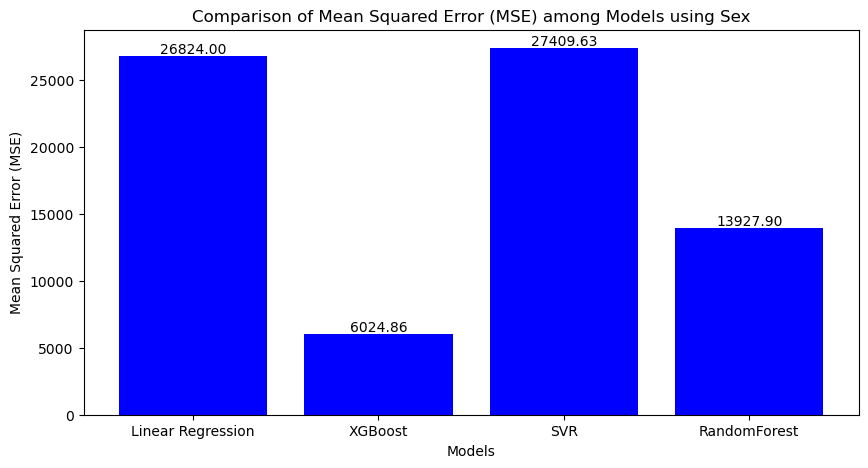

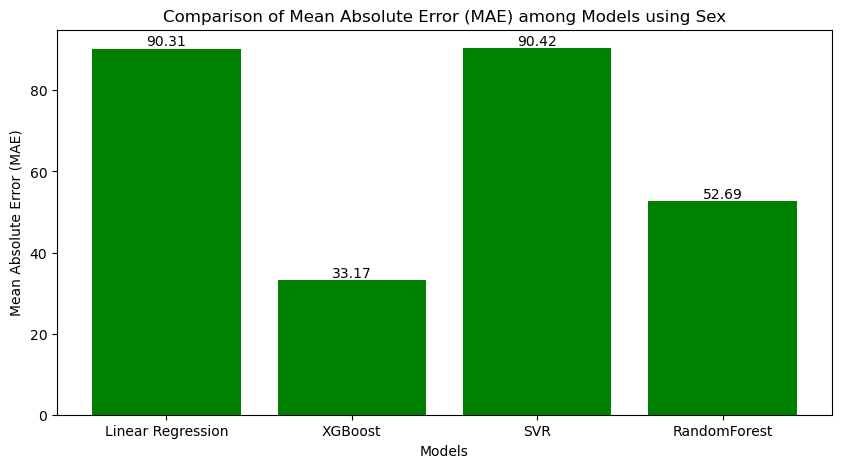

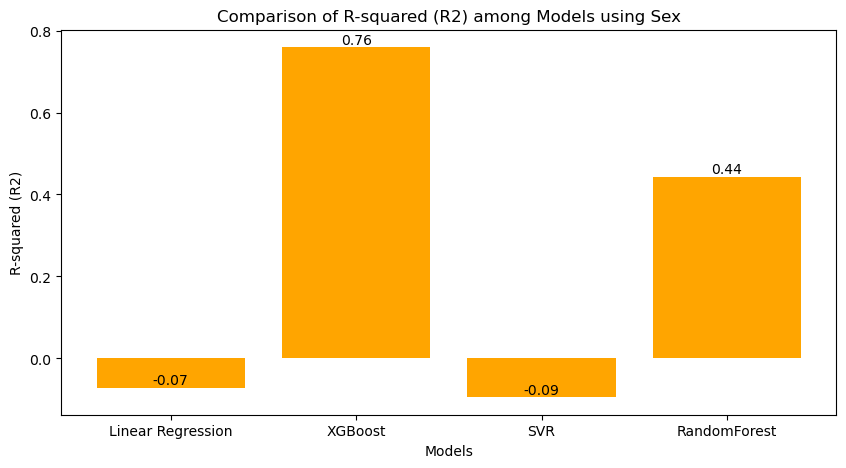

In [7]:
import matplotlib.pyplot as plt

# Create a list of model names and their respective metrics
models = ['Linear Regression', 'XGBoost', 'SVR', 'RandomForest']
mse_scores = [linear_mse, xgboost_mse, svr_mse, rf_mse]
mae_scores = [linear_mae, xgboost_mae, svr_mae,rf_mae]
r2_scores = [linear_r2, xgboost_r2, svr_r2,rf_r2]

# Plot Mean Squared Error (MSE)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, mse_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) among Models using Sex')

# Add annotations to the bars
for bar, mse in zip(bars, mse_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

plt.show()


# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, mae_scores, color='green')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) among Models using Sex')
# Add annotations to the bars
for bar, mae in zip(bars, mae_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

plt.show()

# Plot R-squared (R2)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, r2_scores, color='orange')
plt.xlabel('Models')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared (R2) among Models using Sex')
# Add annotations to the bars
for bar, r2 in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

plt.show()

